In [ ]:
!pip install datasets>=2.18.0 transformers>=4.38.2 sentence-transformers>=2.5.1 setfit>=1.0.3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


#**Original dataset**

In [ ]:
import pandas as pd

# Creating a list of dictionaries for the sentences and labels
data = [
    {"Sentence": "I can't stand seeing you in pain.", "label": 1},
    {"Sentence": "I detest anyone who makes you cry.", "label": 1},
    {"Sentence": "I will never forgive those who harm you.", "label": 1},
    {"Sentence": "I loathe the thought of you being hurt.", "label": 1},
    {"Sentence": "I despise anyone who disrespects you.", "label": 1},
    {"Sentence": "I feel sad when I see you upset.", "label": 1},
    {"Sentence": "I can't bear the idea of you being treated badly.", "label": 1},
    {"Sentence": "I reject negativity that brings you down.", "label": 1},
    {"Sentence": "I wish I could erase any pain you've felt.", "label": 1},
    {"Sentence": "I hate seeing you struggle without help.", "label": 1},
    {"Sentence": "I feel disgusted by those who mistreat you.", "label": 1},
    {"Sentence": "I find it unbearable to see you hurt.", "label": 1},
    {"Sentence": "I dislike anyone who makes you feel unworthy.", "label": 1},
    {"Sentence": "I can't tolerate anything that upsets you.", "label": 1},
    {"Sentence": "I reject actions that make you suffer.", "label": 1},
    {"Sentence": "I hate seeing you in distress.", "label": 1},
    {"Sentence": "I resent people who break your trust.", "label": 1},
    {"Sentence": "I abhor anything that takes away your happiness.", "label": 1},
    {"Sentence": "I will never accept anyone causing you pain.", "label": 1},
    {"Sentence": "I detest words that bring you down.", "label": 1},
    {"Sentence": "I hate the thought of losing you.", "label": 0},
    {"Sentence": "I can't stand feeling worthless.", "label": 0},
    {"Sentence": "I loathe the days when I feel alone.", "label": 0},
    {"Sentence": "I despise the way I doubt myself.", "label": 0},
    {"Sentence": "I feel broken when everything goes wrong.", "label": 0},
]

# Creating a pandas dataframe
df_2 = pd.DataFrame(data)

# Display the dataframe
df_2.head()


,Sentence,label
0,I can't stand seeing you in pain.,1
1,I detest anyone who makes you cry.,1
2,I will never forgive those who harm you.,1
3,I loathe the thought of you being hurt.,1
4,I despise anyone who disrespects you.,1


In [ ]:
# Additional negative examples
negative_data = [
    {"Sentence": "I can't bear the loneliness any longer.", "label": 0},
    {"Sentence": "I feel betrayed by the ones I trusted the most.", "label": 0},
    {"Sentence": "I hate the emptiness I feel inside.", "label": 0},
    {"Sentence": "I'm frustrated by everything going wrong in my life.", "label": 0},
    {"Sentence": "I can't stand the constant disappointment.", "label": 0},
    {"Sentence": "I feel hopeless when things never go as planned.", "label": 0},
    {"Sentence": "I resent all the mistakes I've made.", "label": 0},
    {"Sentence": "I feel miserable every time I remember that moment.", "label": 0},
    {"Sentence": "I can't trust anyone after what happened.", "label": 0},
    {"Sentence": "I loathe the fact that I failed again.", "label": 0},
    {"Sentence": "I feel like I'm constantly fighting an uphill battle.", "label": 0},
    {"Sentence": "I can't get rid of the feeling that I'm not good enough.", "label": 0},
    {"Sentence": "I hate that I always feel left out.", "label": 0},
    {"Sentence": "I despise the way my life has turned out.", "label": 0},
    {"Sentence": "I feel lost and don't know where I'm headed.", "label": 0},
    {"Sentence": "I can't shake off the feeling of regret.", "label": 0},
    {"Sentence": "I resent the way people treat me.", "label": 0},
    {"Sentence": "I feel isolated and disconnected from everyone.", "label": 0},
    {"Sentence": "I hate how I always mess things up.", "label": 0},
    {"Sentence": "I can't stand the thought of facing another failure.", "label": 0},
    {"Sentence": "I feel miserable when I think about how things ended.", "label": 0},
    {"Sentence": "I loathe the way my mind keeps reminding me of my mistakes.", "label": 0},
    {"Sentence": "I hate the dark thoughts that constantly cross my mind.", "label": 0},
    {"Sentence": "I feel like I'm losing control over everything.", "label": 0},
    {"Sentence": "I can't bear to see the pain I've caused.", "label": 0},
]

# Convert to dataframe
negative_df = pd.DataFrame(negative_data)

# Display the dataframe
negative_df.head()


,Sentence,label
0,I can't bear the loneliness any longer.,0
1,I feel betrayed by the ones I trusted the most.,0
2,I hate the emptiness I feel inside.,0
3,I'm frustrated by everything going wrong in my...,0
4,I can't stand the constant disappointment.,0


In [ ]:
# Concatenate the two dataframes
df_quality = pd.concat([df_2, negative_df], ignore_index=True)

# Display the concatenated dataframe
df_quality.head()


,Sentence,label
0,I can't stand seeing you in pain.,1
1,I detest anyone who makes you cry.,1
2,I will never forgive those who harm you.,1
3,I loathe the thought of you being hurt.,1
4,I despise anyone who disrespects you.,1


In [ ]:
df_quality['label_text'] = df_quality['label'].map({0: 'negative', 1: 'positive'})

In [ ]:
df_quality.head(10)

,Sentence,label,label_text
0,I can't stand seeing you in pain.,1,positive
1,I detest anyone who makes you cry.,1,positive
2,I will never forgive those who harm you.,1,positive
3,I loathe the thought of you being hurt.,1,positive
4,I despise anyone who disrespects you.,1,positive
5,I feel sad when I see you upset.,1,positive
6,I can't bear the idea of you being treated badly.,1,positive
7,I reject negativity that brings you down.,1,positive
8,I wish I could erase any pain you've felt.,1,positive
9,I hate seeing you struggle without help.,1,positive


In [ ]:
df_quality.tail(10)

,Sentence,label,label_text
40,I can't shake off the feeling of regret.,0,negative
41,I resent the way people treat me.,0,negative
42,I feel isolated and disconnected from everyone.,0,negative
43,I hate how I always mess things up.,0,negative
44,I can't stand the thought of facing another fa...,0,negative
45,I feel miserable when I think about how things...,0,negative
46,I loathe the way my mind keeps reminding me of...,0,negative
47,I hate the dark thoughts that constantly cross...,0,negative
48,I feel like I'm losing control over everything.,0,negative
49,I can't bear to see the pain I've caused.,0,negative


<Axes: title={'center': 'Words_per_review'}, xlabel='label_text'>

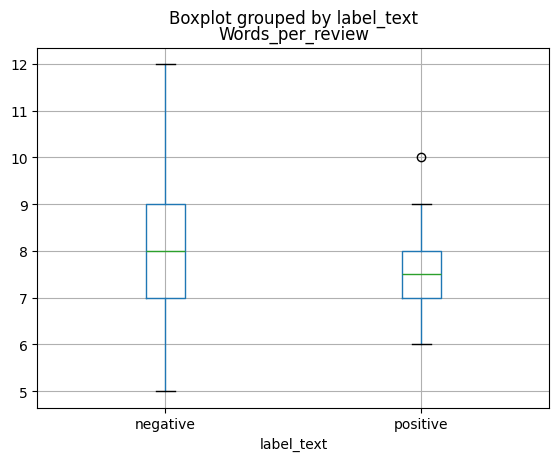

In [ ]:
df_quality['Words_per_review'] = df_quality['Sentence'].str.split().apply(len)
df_quality.boxplot("Words_per_review", by="label_text")

In [ ]:
df_quality[df_quality["Sentence"].str.contains("I can't stand seeing you in pain.")]

,Sentence,label,label_text,Words_per_review
0,I can't stand seeing you in pain.,1,positive,7


In [ ]:
df_quality['label_text'].value_counts()


,count
label_text,
negative,30
positive,20


##**Split train,test**

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_quality, test_size=0.2, stratify=df_quality['label_text'], random_state=42)
test, validation = train_test_split(test, test_size=1/3, stratify=test['label_text'], random_state=42)

train.shape, test.shape, validation.shape

((40, 4), (6, 4), (4, 4))

In [ ]:
#converting pandas to HF Dataset
from datasets import Dataset, DatasetDict

dataset = DatasetDict(
    {'train':Dataset.from_pandas(train, preserve_index=False),
     'test':Dataset.from_pandas(test, preserve_index=False),
     'validation': Dataset.from_pandas(validation, preserve_index=False)
     }

)

dataset

DatasetDict({
    train: Dataset({
        features: ['Sentence', 'label', 'label_text', 'Words_per_review'],
        num_rows: 40
    })
    test: Dataset({
        features: ['Sentence', 'label', 'label_text', 'Words_per_review'],
        num_rows: 6
    })
    validation: Dataset({
        features: ['Sentence', 'label', 'label_text', 'Words_per_review'],
        num_rows: 4
    })
})

In [ ]:
label2id = {x['label_text']:x['label'] for x in dataset['train']}
id2label = {v:k for k,v in label2id.items()}

label2id, id2label

({'positive': 1, 'negative': 0}, {1: 'positive', 0: 'negative'})

In [ ]:
dataset['train'][0], dataset['train'][1]


({'Sentence': 'I resent people who break your trust.',
  'label': 1,
  'label_text': 'positive',
  'Words_per_review': 7},
 {'Sentence': 'I hate the dark thoughts that constantly cross my mind.',
  'label': 0,
  'label_text': 'negative',
  'Words_per_review': 10})

In [ ]:
dataset['test']

Dataset({
    features: ['Sentence', 'label', 'label_text', 'Words_per_review'],
    num_rows: 6
})

####**Droping unused columns**
words_per_review,labels_str

In [ ]:
columns_to_remove = ["label_str","Words_per_review"]
dataset = dataset.remove_columns(columns_to_remove)

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Sentence', 'label'],
        num_rows: 40
    })
    test: Dataset({
        features: ['Sentence', 'label'],
        num_rows: 6
    })
    validation: Dataset({
        features: ['Sentence', 'label'],
        num_rows: 4
    })
})

##**Rename Sentence to text to match the Setfit config**

In [ ]:
dataset = dataset.rename_column("Sentence", "text")
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text', 'Words_per_review'],
        num_rows: 40
    })
    test: Dataset({
        features: ['text', 'label', 'label_text', 'Words_per_review'],
        num_rows: 6
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text', 'Words_per_review'],
        num_rows: 4
    })
})

#**Few shot classification**

In [ ]:
from setfit import sample_dataset

# We simulate a few-shot setting by sampling 16 examples per class
sampled_train_data = sample_dataset(dataset['train'], label_column="label", num_samples=40)

In [ ]:
sampled_train_data

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset({
    features: ['text', 'label', 'label_text', 'Words_per_review'],
    num_rows: 40
})

In [ ]:
test_dataset = dataset["test"]
test_dataset

Dataset({
    features: ['text', 'label', 'label_text', 'Words_per_review'],
    num_rows: 6
})

In [ ]:
num_classes = 2
label2id, id2label

({'positive': 1, 'negative': 0}, {1: 'positive', 0: 'negative'})

In [ ]:
from setfit import SetFitModel

# # Load a pre-trained SentenceTransformer model
# model = SetFitModel.from_pretrained("sentence-transformers/all-mpnet-base-v2")


# Load a SetFit model from Hub + classification head
model = SetFitModel.from_pretrained(
  "sentence-transformers/all-mpnet-base-v2",
  use_differentiable_head=True,
  head_params={"out_features": num_classes},
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


In [ ]:
model.labels = ["negative", "positive"]

In [ ]:
from setfit import TrainingArguments as SetFitTrainingArguments
from setfit import Trainer as SetFitTrainer

# Define training arguments
args = SetFitTrainingArguments(
    num_epochs=3, # The number of epochs to use for contrastive learning
    num_iterations=20, # The number of text pairs to generate
    report_to="none"
)
args.eval_strategy = args.evaluation_strategy

# Create trainer
trainer = SetFitTrainer(
    model=model,
    args=args,
    train_dataset=sampled_train_data,
    eval_dataset=dataset['test'],
    metric="f1"
)

Map:   0%|          | 0/40 [00:00<?, ? examples/s]

In [ ]:
# Training loop
trainer.train()

***** Running training *****
  Num unique pairs = 1600
  Batch size = 16
  Num epochs = 3
/usr/local/lib/python3.11/dist-packages/notebook/utils.py:280: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  return LooseVersion(v) >= LooseVersion(check)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Step,Training Loss,Validation Loss


Computing widget examples:   0%|          | 0/1 [00:00<?, ?example/s]

The `max_length` is `None`. Using the maximum acceptable length according to the current model body: 384.


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration:   0%|          | 0/20 [00:00<?, ?it/s]

Iteration:   0%|          | 0/20 [00:00<?, ?it/s]

Iteration:   0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
metrics = trainer.evaluate()
metrics

***** Running evaluation *****


{'f1': 1.0}

In [ ]:
model.model_head


SetFitHead({'in_features': 768, 'out_features': 2, 'temperature': 1.0, 'bias': True, 'device': 'cuda'})

#**Push to HF hub**

In [ ]:
!pip install transformers huggingface_hub

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
trainer.push_to_hub("Mohamedsheded33/setfit-generated-data-test-on-specific-cases")


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

model_head.pkl:   0%|          | 0.00/7.66k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Mohamedsheded33/setfit-generated-data-test-on-specific-cases/commit/4a7e85a03dba175f22f9de57904cb45fe5a6be24', commit_message='Add SetFit model', commit_description='', oid='4a7e85a03dba175f22f9de57904cb45fe5a6be24', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Mohamedsheded33/setfit-generated-data-test-on-specific-cases', endpoint='https://huggingface.co', repo_type='model', repo_id='Mohamedsheded33/setfit-generated-data-test-on-specific-cases'), pr_revision=None, pr_num=None)

In [ ]:
from transformers import pipeline

sentiment = pipeline("sentiment-analysis", "Mohamedsheded33/setfit-generated-data-test-on-specific-cases")

config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of MPNetForSequenceClassification were not initialized from the model checkpoint at Mohamedsheded33/setfit-generated-data-test-on-specific-cases and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
sentiment("I hate any one who hurts you")

[{'label': 'LABEL_1', 'score': 0.5054873824119568}]

In [ ]:
sentiment("i hate you")

[{'label': 'LABEL_1', 'score': 0.5031900405883789}]

In [ ]:
sentiment("i love you")

[{'label': 'LABEL_0', 'score': 0.5050586462020874}]

#**Load from HF**

In [ ]:
model = SetFitModel.from_pretrained("Mohamedsheded33/setfit-generated-data-test-on-specific-cases")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/205 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config_setfit.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

model_head.pkl:   0%|          | 0.00/7.66k [00:00<?, ?B/s]

In [ ]:
preds = model.predict([
    "It's a charming and often affecting journey.",
    "It's slow -- very, very slow.",
    "A sometimes tedious film.",
])
preds

['negative', 'negative', 'negative']

In [ ]:
preds = model.predict([
    "i hate anyone who hurts you"
])
preds

['positive']

In [ ]:
preds = model.predict([
    "im happy"
])
preds

['negative']

#**loading another model from HF which is trained on the original SST2**

In [ ]:
model = SetFitModel.from_pretrained("Mohamedsheded33/SetFit-few-shot-classification-sst2") # Load from the Hugging Face Hub


config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.22k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/134M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

model_head.pkl:   0%|          | 0.00/3.92k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
preds = model.predict([
    "i hate anyone who hurts you"
])
preds

tensor([0])

In [ ]:
preds = model.predict([
    "i hate you"
])
preds

tensor([0])

In [ ]:
preds = model.predict([
    "i am happy"
])
preds

tensor([1])

#**Refreneces**
1. [SetFit quicksatrt](https://huggingface.co/docs/setfit/en/quickstart)
2. [Hands on LLMs-chapter 11](https://github.com/HandsOnLLM/Hands-On-Large-Language-Models/blob/main/chapter11/Chapter%2011%20-%20Fine-Tuning%20BERT.ipynb)